## Many of the following plots are from https://www.r-graph-gallery.com

## This website has an excellent collection of sample code for various types of graphs in R. The picture below shows a summary of them, and clicking on any of the images (on the website, not here in this notebook) will direct you to a description and sample code - often for several variations of the graph type.

NOTE: Only a small subset of the available plot types are shown in this lesson. One caution I have to pass along is that many of the more sophisticated/exotic ones depend upon packages that may or may not work well with your current collection of R packages. I highly recommend experimenting with them via a special environment so that you do not jeopardize the integrity/stability of your current collection of packages.

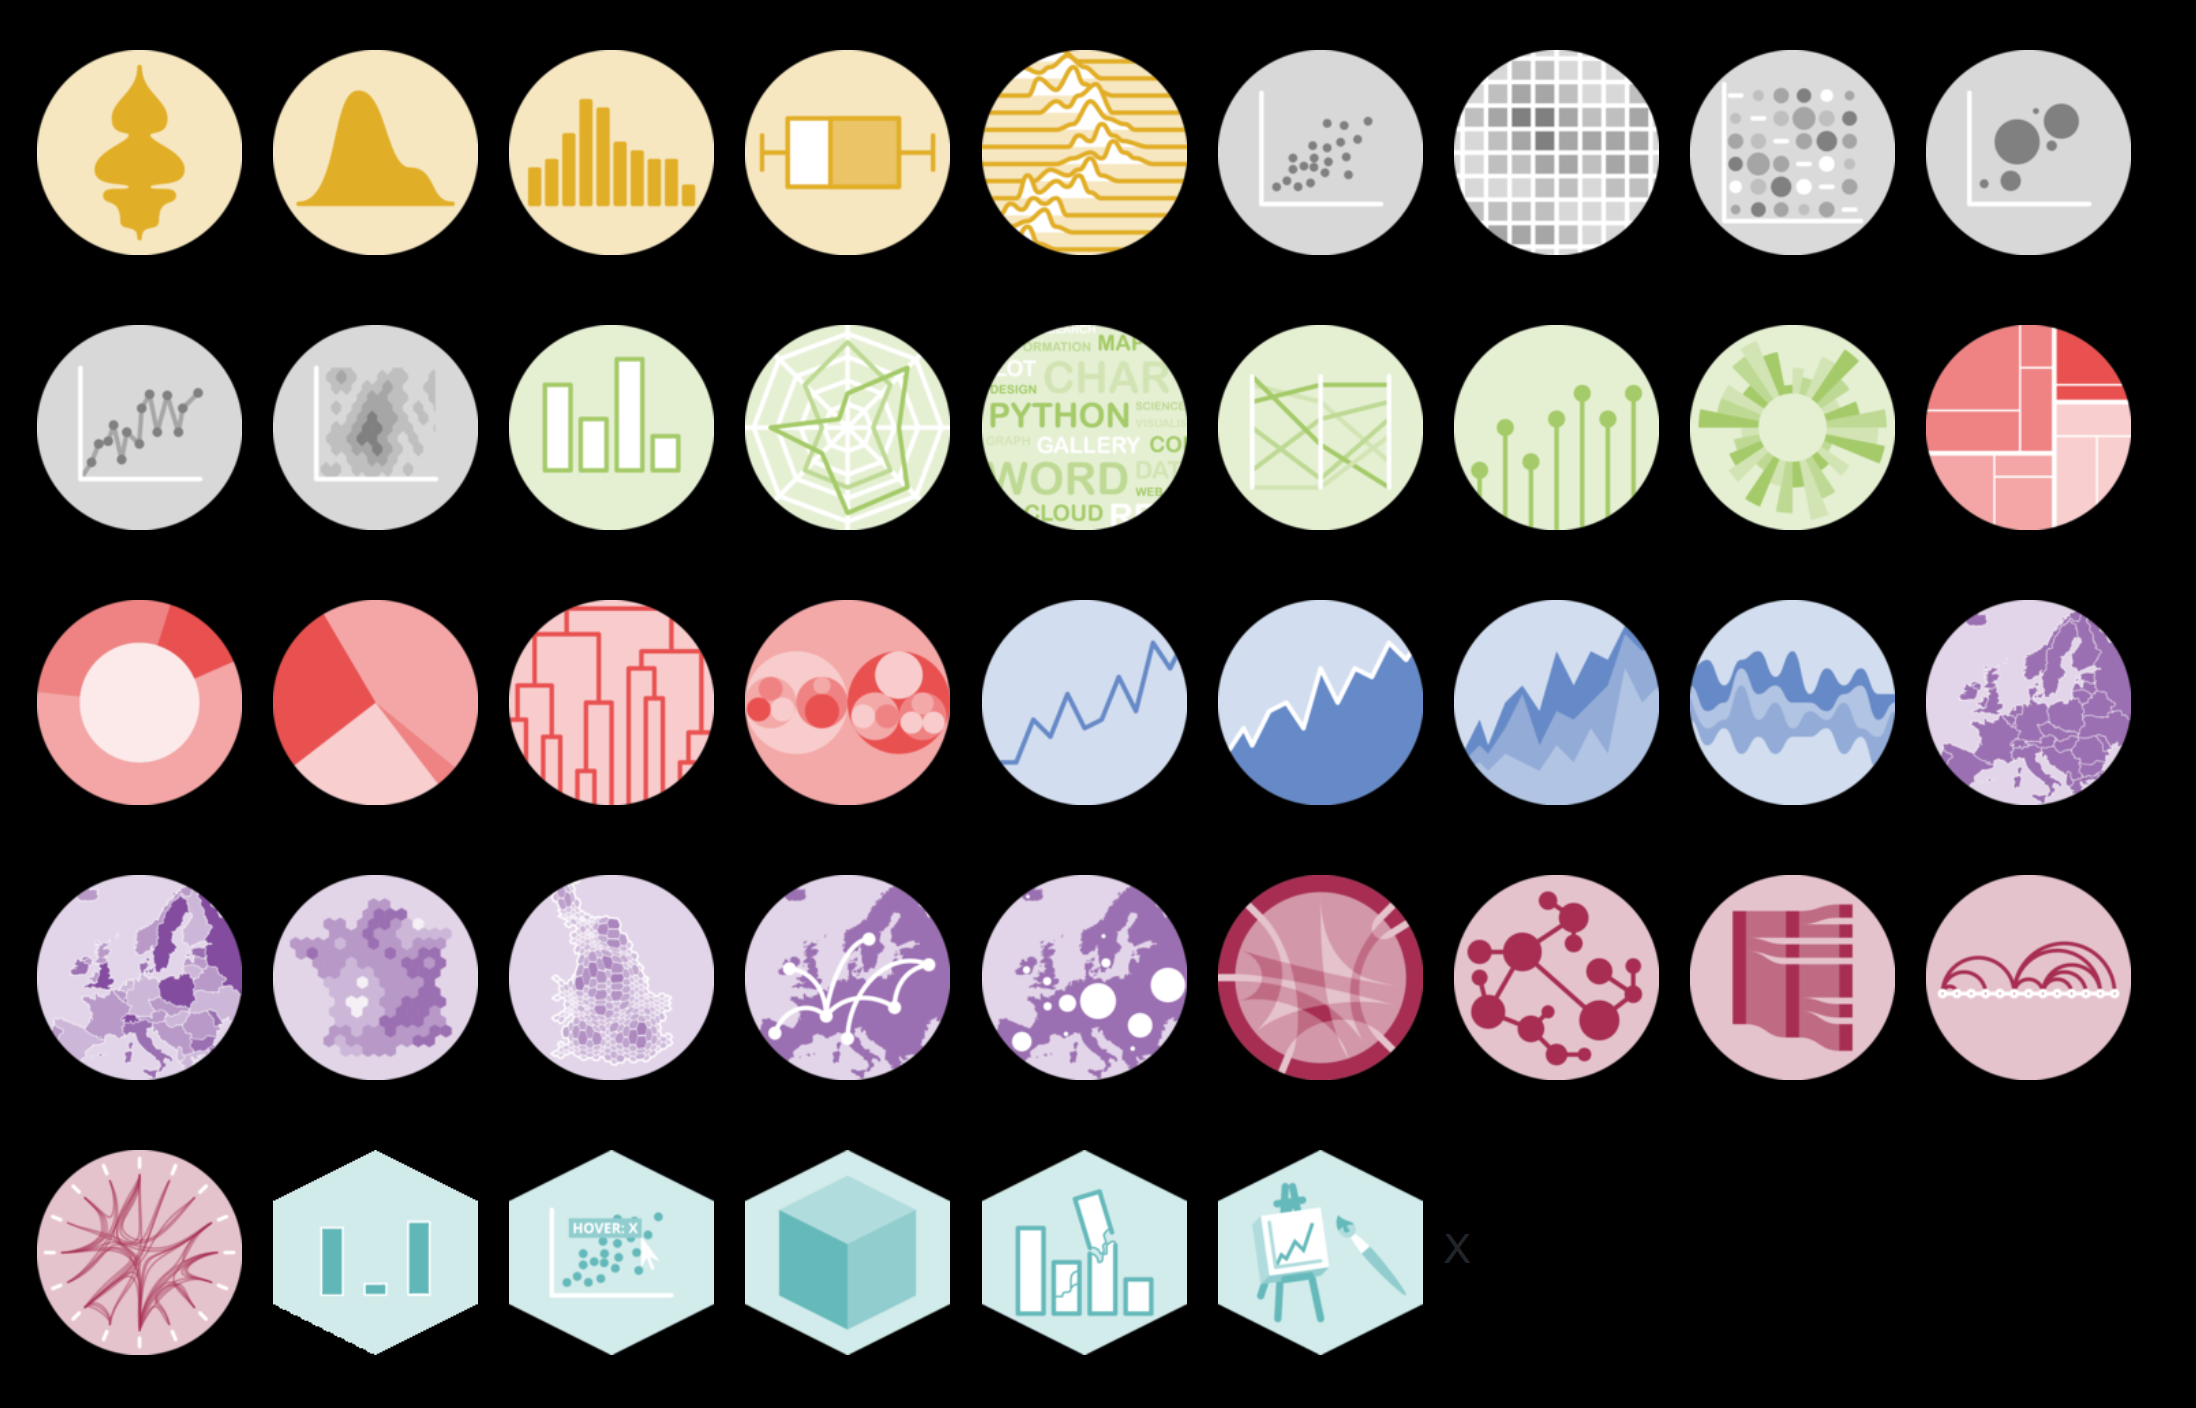

In [1]:
rm(list=(ls())) # clear memory

###  Created by Hadley Wickham in 2005, ggplot2 is an implementation of Leland Wilkinson's Grammar of Graphics—a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers.You provide the data, tell ggplot2 how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.

### If you are new to ggplot2 you are better off starting with a systematic introduction, rather than trying to learn from reading individual documentation pages. Currently, there are three good places to start:

* The Data Visualisation and Graphics for communication chapters in R for Data Science. R for Data Science is designed to give you a comprehensive introduction to the tidyverse, and these two chapters will get you up to speed with the essentials of ggplot2 as quickly as possible.

* If you’d like to take an online course, try Data Visualization in R With ggplot2 by Kara Woo.

* If you want to dive into making common graphics as quickly as possible, I recommend The R Graphics Cookbook by Winston Chang. It provides a set of recipes to solve common graphics problems.

### If you’ve mastered the basics and want to learn more, read ggplot2: Elegant Graphics for Data Analysis. It describes the theoretical underpinnings of ggplot2 and shows you how all the pieces fit together. This book helps you understand the theory that underpins ggplot2, and will help you create new types of graphics specifically tailored to your needs. The book is not available for free, but you can find the complete source for the book at https://github.com/hadley/ggplot2-book.

### The easiest way to get ggplot2 is to install the whole tidyverse:

In [2]:
if (!require("tidyverse")) {install.packages("tidyverse", repos = "http://cran.us.r-project.org")}

Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Scatterplot
### Here is a quick and easy scatterplot of the mpg data

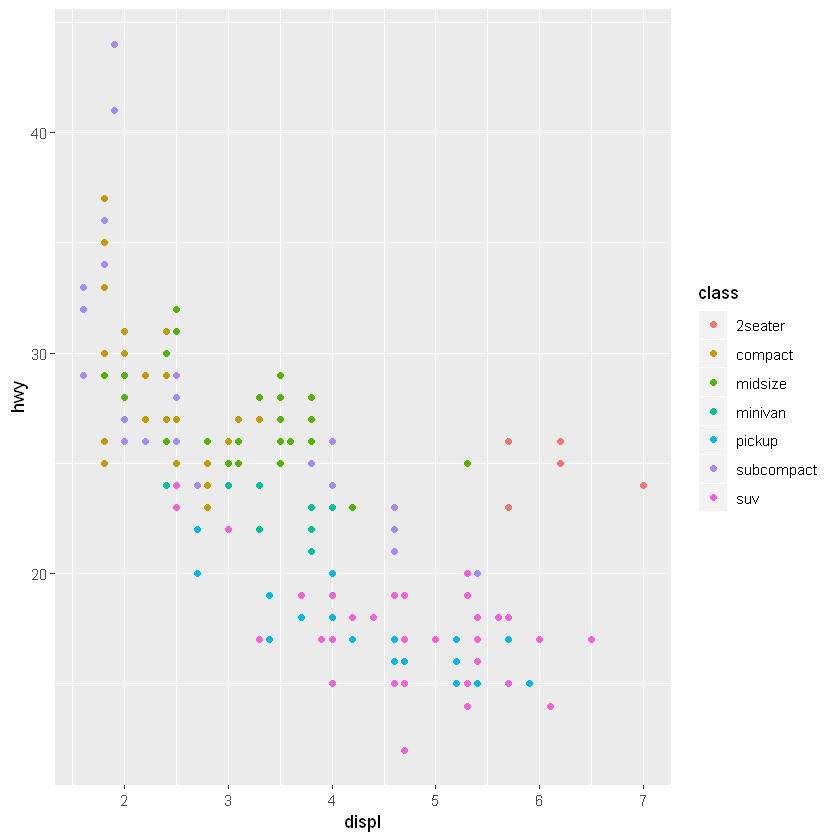

In [3]:
library(ggplot2)

ggplot(mpg, aes(displ, hwy, colour = class)) + geom_point()

## Box and Whisker Plot
### Here is a box and whisker plot of the same data

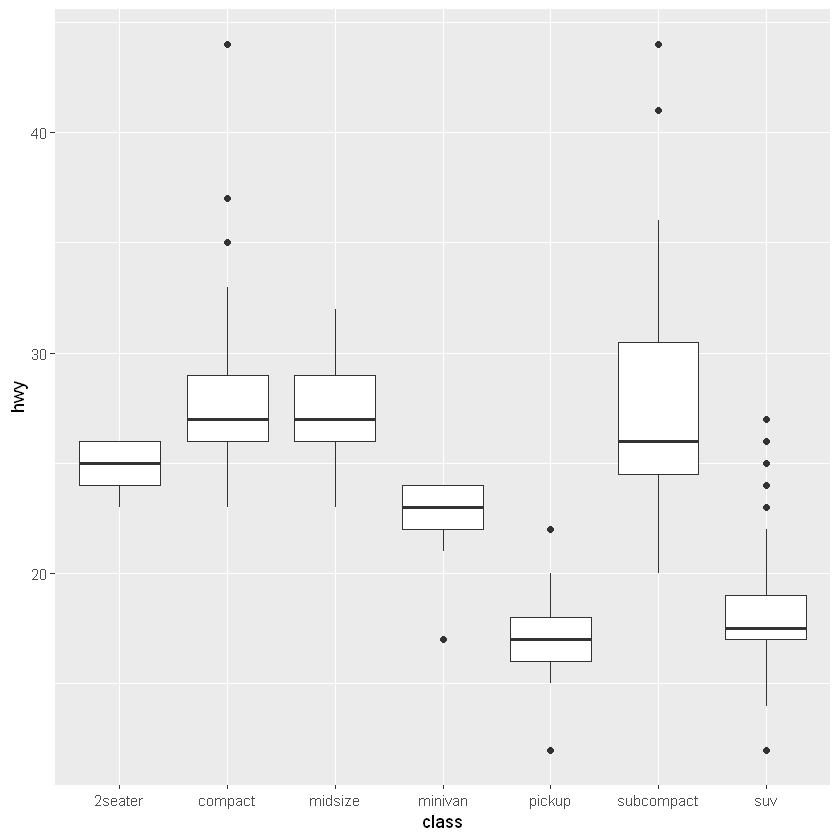

In [5]:
library(ggplot2)
p <- ggplot(mpg, aes(class, hwy))
p + geom_boxplot()

## Violin Plot
### Violin plots are similar to box plots, except that they also show the kernel probability density of the data at different values. Typically, violin plots will include a marker for the median of the data and a box indicating the interquartile range, as in standard box plots.

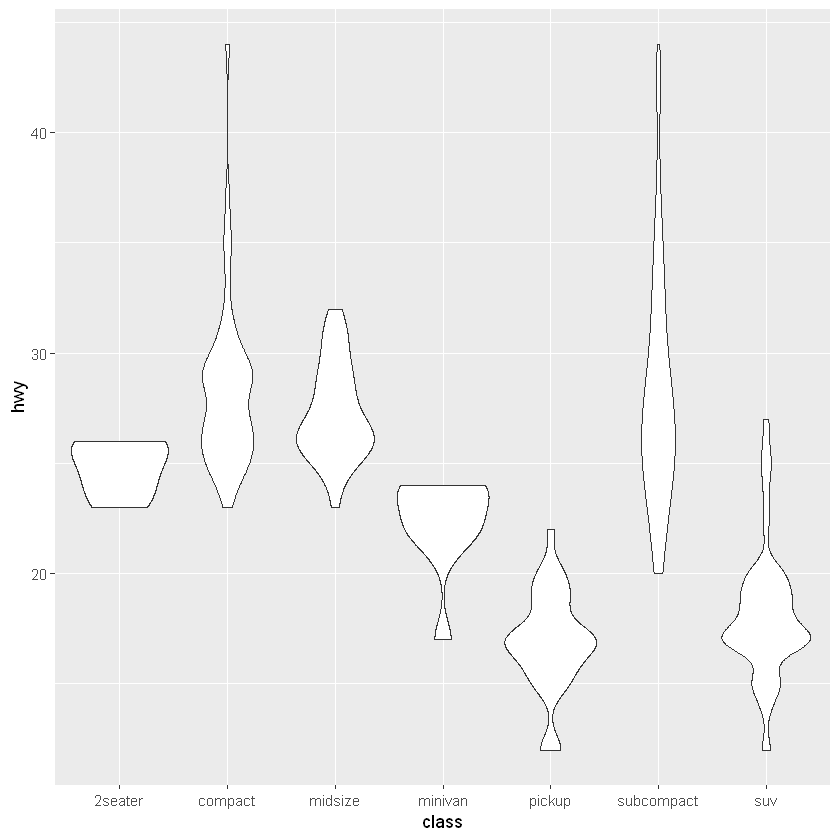

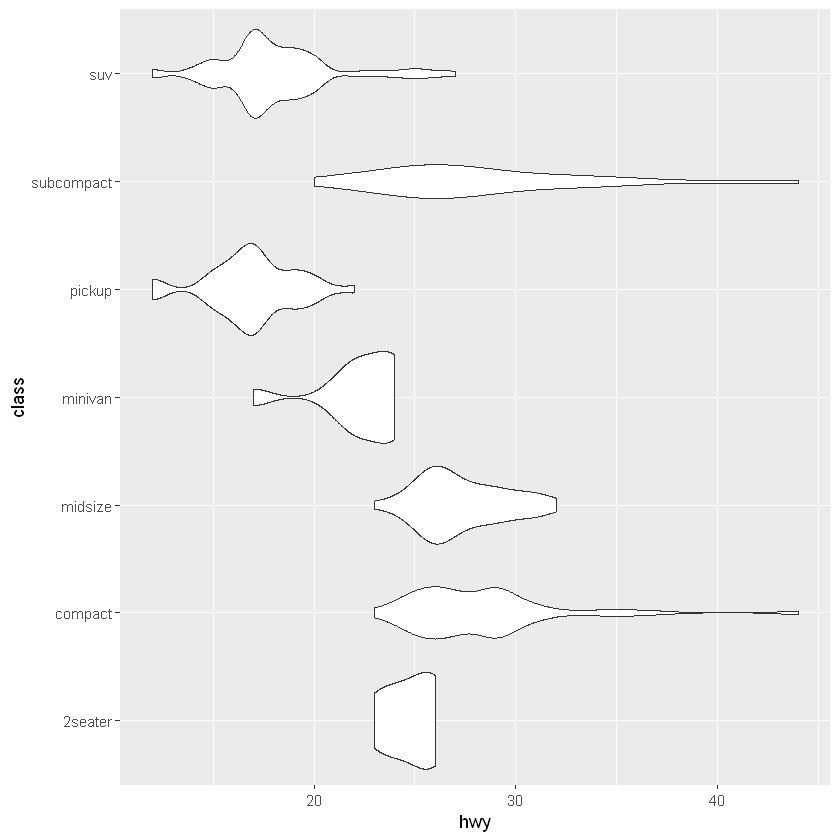

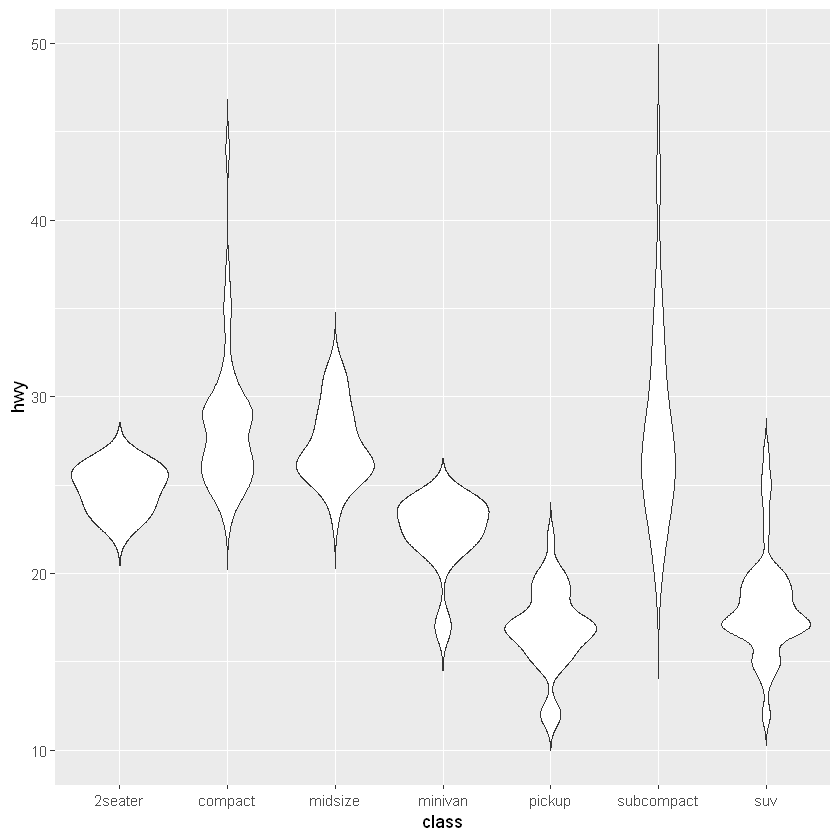

In [6]:
p <- ggplot(mpg, aes(x=class, y=hwy)) + 
  geom_violin()
p
# Rotate the violin plot
p + coord_flip()
# Set trim argument to FALSE
ggplot(mpg, aes(x=class, y=hwy)) + 
  geom_violin(trim=FALSE)

## Bubble Plot
### The basic bubble plot adds a third dimension to the information conveyed - the size of each bubble

Loading required package: gapminder
Warning message:
"package 'gapminder' was built under R version 3.6.3"

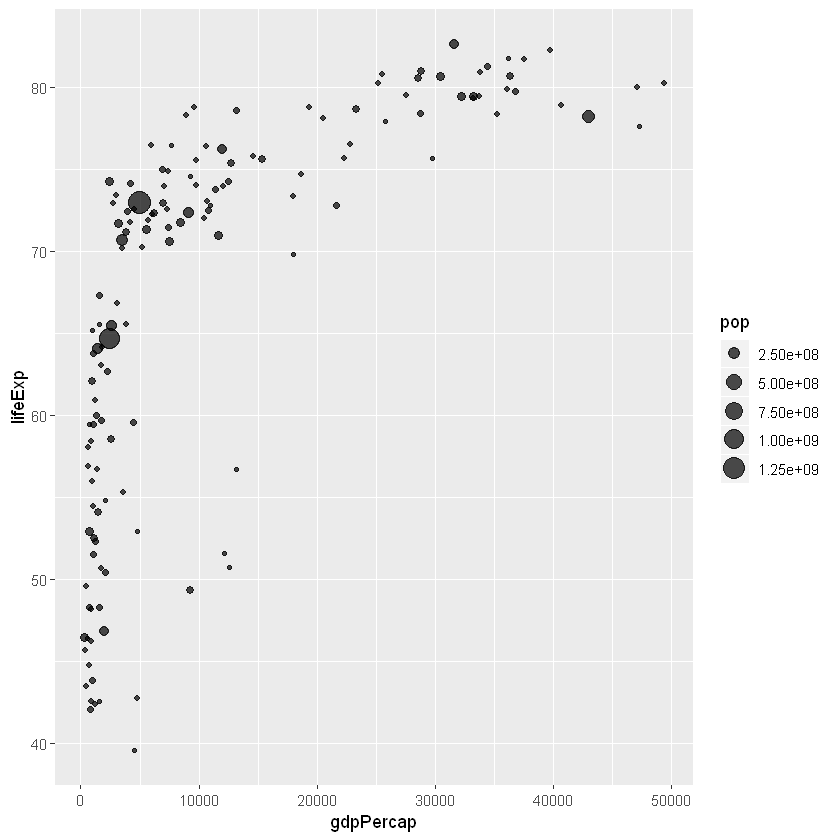

In [7]:
# Libraries
library(ggplot2)
library(dplyr)
if (!require("gapminder")) {install.packages("gapminder", repos = "http://cran.us.r-project.org")}
# The dataset is provided in the gapminder library
library(gapminder)
data <- gapminder %>% filter(year=="2007") %>% dplyr::select(-year)

# Most basic bubble plot
ggplot(data, aes(x=gdpPercap, y=lifeExp, size = pop)) +
    geom_point(alpha=0.7)

### You can even add a fourth diminesion - color to a bubble chart

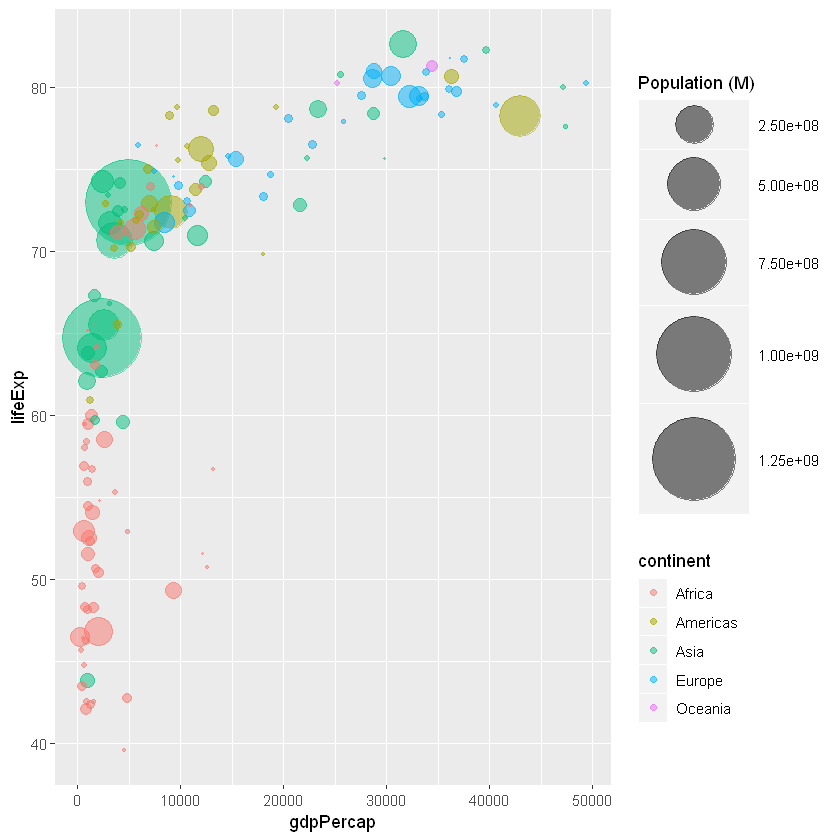

In [8]:
# Libraries
library(ggplot2)
library(dplyr)

# The dataset is provided in the gapminder library
library(gapminder)
data <- gapminder %>% filter(year=="2007") %>% dplyr::select(-year)

# Most basic bubble plot
data %>%
  arrange(desc(pop)) %>%
  mutate(country = factor(country, country)) %>%
  ggplot(aes(x=gdpPercap, y=lifeExp, size=pop, color=continent)) +
    geom_point(alpha=0.5) +
    scale_size(range = c(.1, 24), name="Population (M)")

## Barplots

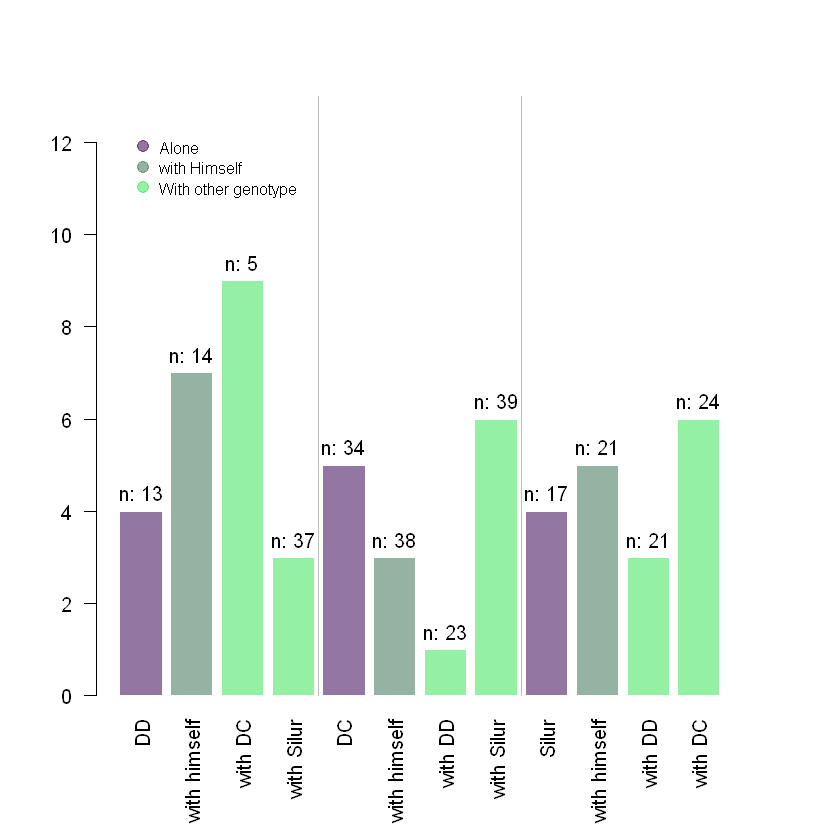

In [12]:
# Data
data <- data.frame(
  name = c("DD","with himself","with DC","with Silur" ,"DC","with himself","with DD","with Silur" ,"Silur","with himself","with DD","with DC" ),
  average = sample(seq(1,10) , 12 , replace=T),
  number = sample(seq(4,39) , 12 , replace=T)
)

# Increase bottom margin
par(mar=c(6,4,4,4))


# Basic Barplot
my_bar <- barplot(data$average , border=F , names.arg=data$name , 
                  las=2 , 
                  col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) , 
                  ylim=c(0,13) , 
                  main="" )

# Add abline
abline(v=c(4.9 , 9.7) , col="grey")
 
# Add the text 
text(my_bar, data$average+0.4 , paste("n: ", data$number, sep="") ,cex=1) 
 
#Legende
legend("topleft", legend = c("Alone","with Himself","With other genotype" ) , 
     col = c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) , 
     bty = "n", pch=20 , pt.cex = 2, cex = 0.8, horiz = FALSE, inset = c(0.05, 0.05))

In [13]:
if (!require("reshape")){install.packages("reshape")}
if (!require("tm")){install.packages("tm")}
if (!require("wordcloud")){install.packages("wordcloud")}
library(reshape)
library(tm)
library(wordcloud)
 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 
# -- STEP 1 : GET THE DATA
# A dataset with 5485 lines, each line has several words.
dataset=read.delim("https://raw.githubusercontent.com/TATABOX42/text-mining-in-r/master/dataset.txt", header=FALSE)
head(dataset) 

Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.6.3"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths

Loading required package: tm
Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: wordcloud
Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


V1
champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter
computer terminal systems cpml completes sale computer terminal systems inc said it has completed the sale of shares of its common stock and warrants to acquire an additional one mln shares to sedio n v of lugano switzerland for dlrs the company said the warrants are exercisable for five years at a purchase price of dlrs per share computer terminal said sedio also has the right to buy additional shares and increase its total holdings up to pct of the computer terminal s outstanding common stock under certain circumstances involving change of control at the company the company said if the conditions occur the warrants would be exercisable at a price equal to pct of its common stock s market price at the time not to exceed dlrs per share computer terminal also said it sold the technolgy rights to its dot matrix impact technology including any future improvements to woodco inc of houston tex for dlrs but it said it would continue to be the exclusive worldwide licensee of the technology for woodco the company said the moves were part of its reorganization plan and would help pay current operation costs and ensure product delivery computer terminal makes computer generated labels forms tags and ticket printers and terminals reuter
cobanco inc cbco year net shr cts vs dlrs net vs assets mln vs mln deposits mln vs mln loans mln vs mln note th qtr not available year includes extraordinary gain from tax carry forward of dlrs or five cts per shr reuter
am international inc am nd qtr jan oper shr loss two cts vs profit seven cts oper shr profit vs profit revs mln vs mln avg shrs mln vs mln six mths oper shr profit nil vs profit cts oper net profit vs profit revs mln vs mln avg shrs mln vs mln note per shr calculated after payment of preferred dividends results exclude credits of or four cts and or nine cts for qtr and six mths vs or six cts and or cts for prior periods from operating loss carryforwards reuter
brown forman inc bfd th qtr net shr one dlr vs cts net mln vs mln revs mln vs mln nine mths shr dlrs vs dlrs net mln vs mln revs billion vs mln reuter
dean foods df sees strong th qtr earnings dean foods co expects earnings for the fourth quarter ending may to exceed those of the same year ago period chairman kenneth douglas told analysts in the fiscal fourth quarter the food processor reported earnings of cts a share douglas also said the year s sales should exceed billion dlrs up from billion dlrs the prior year he repeated an earlier projection that third quarter earnings will probably be off slightly from last year s cts a share falling in the range of cts to cts a share douglas said it was too early to project whether the anticipated fourth quarter performance would be enough for us to exceed the prior year s overall earnings of dlrs a share in douglas said dean should experience a pct improvement in our bottom line from effects of the tax reform act alone president howard dean said in fiscal the company will derive benefits of various dairy and frozen vegetable acquisitions from ryan milk to the larsen co dean also said the company will benefit from its acquisition in late december of elgin blenders inc west chicago he said the company is a major shareholder of e b i foods ltd a united kingdom blender and has licensing arrangements in australia canada brazil and japan it provides ann entry to mcdonalds corp mcd we ve been after for years douglas told analysts reuter


In [14]:
# The labels of each line of the dataset file
dataset_labels <- read.delim("https://raw.githubusercontent.com/TATABOX42/text-mining-in-r/master/labels.txt",header=FALSE)
dataset_labels <- dataset_labels[,1]
dataset_labels_p <- paste("class",dataset_labels,sep="_")
unique_labels <- unique(dataset_labels_p)
head(unique_labels)
 

[1] "class_1" "class_2" "class_3" "class_4" "class_5" "class_6"

In [15]:
# merge documents that match certain class into a list object
dataset_s <- sapply(unique_labels,function(label) list( dataset[dataset_labels_p %in% label,1] ) )
 
 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 
 
# -- STEP2 : COMPUTE DOCUMENT CORPUS TO MAKE TEXT MINING
# convert each list content into a corpus
dataset_corpus <- lapply(dataset_s, function(x) Corpus(VectorSource( toString(x) ))) 
 
# merge all documents into one single corpus
dataset_corpus_all <- dataset_corpus[[1]]
for (i in 2:length(unique_labels)) { dataset_corpus_all <- c(dataset_corpus_all,dataset_corpus[[i]]) }
 
# remove punctuation, numbers and stopwords
dataset_corpus_all <- tm_map(dataset_corpus_all, removePunctuation)
dataset_corpus_all <- tm_map(dataset_corpus_all, removeNumbers)
dataset_corpus_all <- tm_map(dataset_corpus_all, function(x) removeWords(x,stopwords("english")))
 
#remove some unintersting words
words_to_remove <- c("said","from","what","told","over","more","other","have","last","with","this","that","such","when","been","says","will","also","where","why","would","today")
dataset_corpus_all <- tm_map(dataset_corpus_all, removeWords, words_to_remove)
 
# compute term matrix & convert to matrix class --> you get a table summarizing the occurence of each word in each class.
document_tm <- TermDocumentMatrix(dataset_corpus_all)
document_tm_mat <- as.matrix(document_tm)
colnames(document_tm_mat) <- unique_labels
document_tm_clean <- removeSparseTerms(document_tm, 0.8)
document_tm_clean_mat <- as.matrix(document_tm_clean)
colnames(document_tm_clean_mat) <- unique_labels
 
# remove words in term matrix with length < 4
index <- as.logical(sapply(rownames(document_tm_clean_mat), function(x) (nchar(x)>3) ))
document_tm_clean_mat_s <- document_tm_clean_mat[index,]
 
# Have a look to the matrix you are going to use for wordcloud !
head(document_tm_clean_mat_s)
 
 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 
# -- STEP 3 : make the graphics !
 
# Graph 1 : first top 500 discriminant words
png("#102_1_comparison_cloud_top_500_words.png", width = 480, height = 480)
comparison.cloud(document_tm_clean_mat_s, max.words=500, random.order=FALSE,c(4,0.4), title.size=1.4)
dev.off()
 
# Graph 2 : first top 2000 discriminant words
png("#102_1_comparison_cloud_top_2000_words.png", width = 480, height = 480)
comparison.cloud(document_tm_clean_mat_s,max.words=2000,random.order=FALSE,c(4,0.4), title.size=1.4)
dev.off()
 
# Graph 3: commonality word cloud : first top 2000 common words across classes
png("#103_commonality_wordcloud.png", width = 480, height = 480)
commonality.cloud(document_tm_clean_mat_s, max.words=2000, random.order=FALSE)
dev.off()

ERROR: Error in UseMethod("tm_map", x): no applicable method for 'tm_map' applied to an object of class "list"


## Pie charts

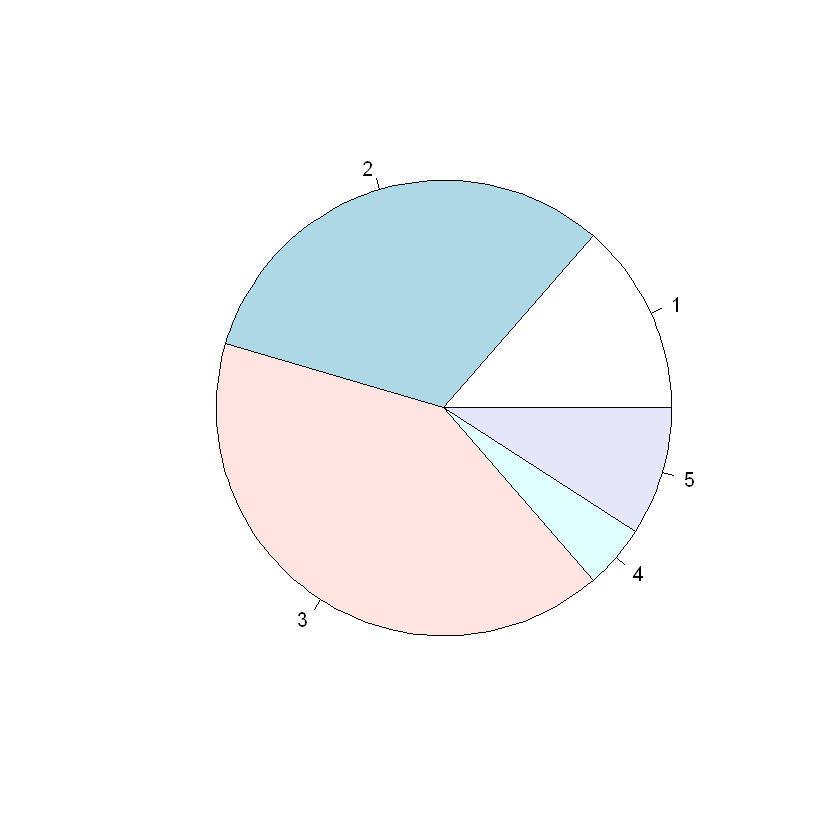

In [16]:
# Create Data
Prop <- c(3,7,9,1,2)
 
# Make the default Pie Plot
pie(Prop)